In [1]:
from KGS import *

# Suseptibility Raw data

In [2]:
Ag_sus = pd.read_csv('SQUID_Uterecht_data/20240222_NCCO_AG.dat', header=20, na_values=[''])
UBC_sus = pd.read_csv('SQUID_Uterecht_data/20240223_NCCO_SC_Canada4_full_size.dat', header=20, na_values=[''])
KU_sus = pd.read_csv('SQUID_Uterecht_data/20240226_NCCO_P_Copenhagen_annealed.dat', header=20, na_values=[''])

print(UBC_sus)

             Time  Comment  Field (Oe)  Temperature (K)  Long Moment (emu)  \
0    1.708724e+09      NaN        10.0         1.800814          -0.211449   
1    1.708724e+09      NaN        10.0         2.343911          -0.211476   
2    1.708724e+09      NaN        10.0         2.847054          -0.211488   
3    1.708724e+09      NaN        10.0         3.168666          -0.211482   
4    1.708724e+09      NaN        10.0         3.758556          -0.211477   
..            ...      ...         ...              ...                ...   
189  1.708770e+09      NaN        10.0        47.993290           0.001147   
190  1.708770e+09      NaN        10.0        48.502520           0.001138   
191  1.708770e+09      NaN        10.0        48.998110           0.001131   
192  1.708770e+09      NaN        10.0        49.503940           0.001123   
193  1.708770e+09      NaN        10.0        50.006730           0.001116   

     Long Scan Std Dev  Long Algorithm  Long Reg Fit  Long Perc

In [3]:
plt.rcParams.update({
    'figure.figsize': (3.5, 2.5),     # Width x Height in inches for single plots
    'font.size': 10,                  # Base font size
    'axes.labelsize': 10,             # Label font size
    'xtick.labelsize': 8,             # X-axis tick label size
    'ytick.labelsize': 8,             # Y-axis tick label size
    'legend.fontsize': 8,             # Legend font size
    'axes.titlesize': 10,             # Title font size
    'figure.dpi': 300,                # Dots per inch for high-quality output
    'savefig.dpi': 300,
    'font.family': 'serif',    # Use serif font to match many article styles
    'lines.linewidth': 1.5                # DPI for saving figures
})

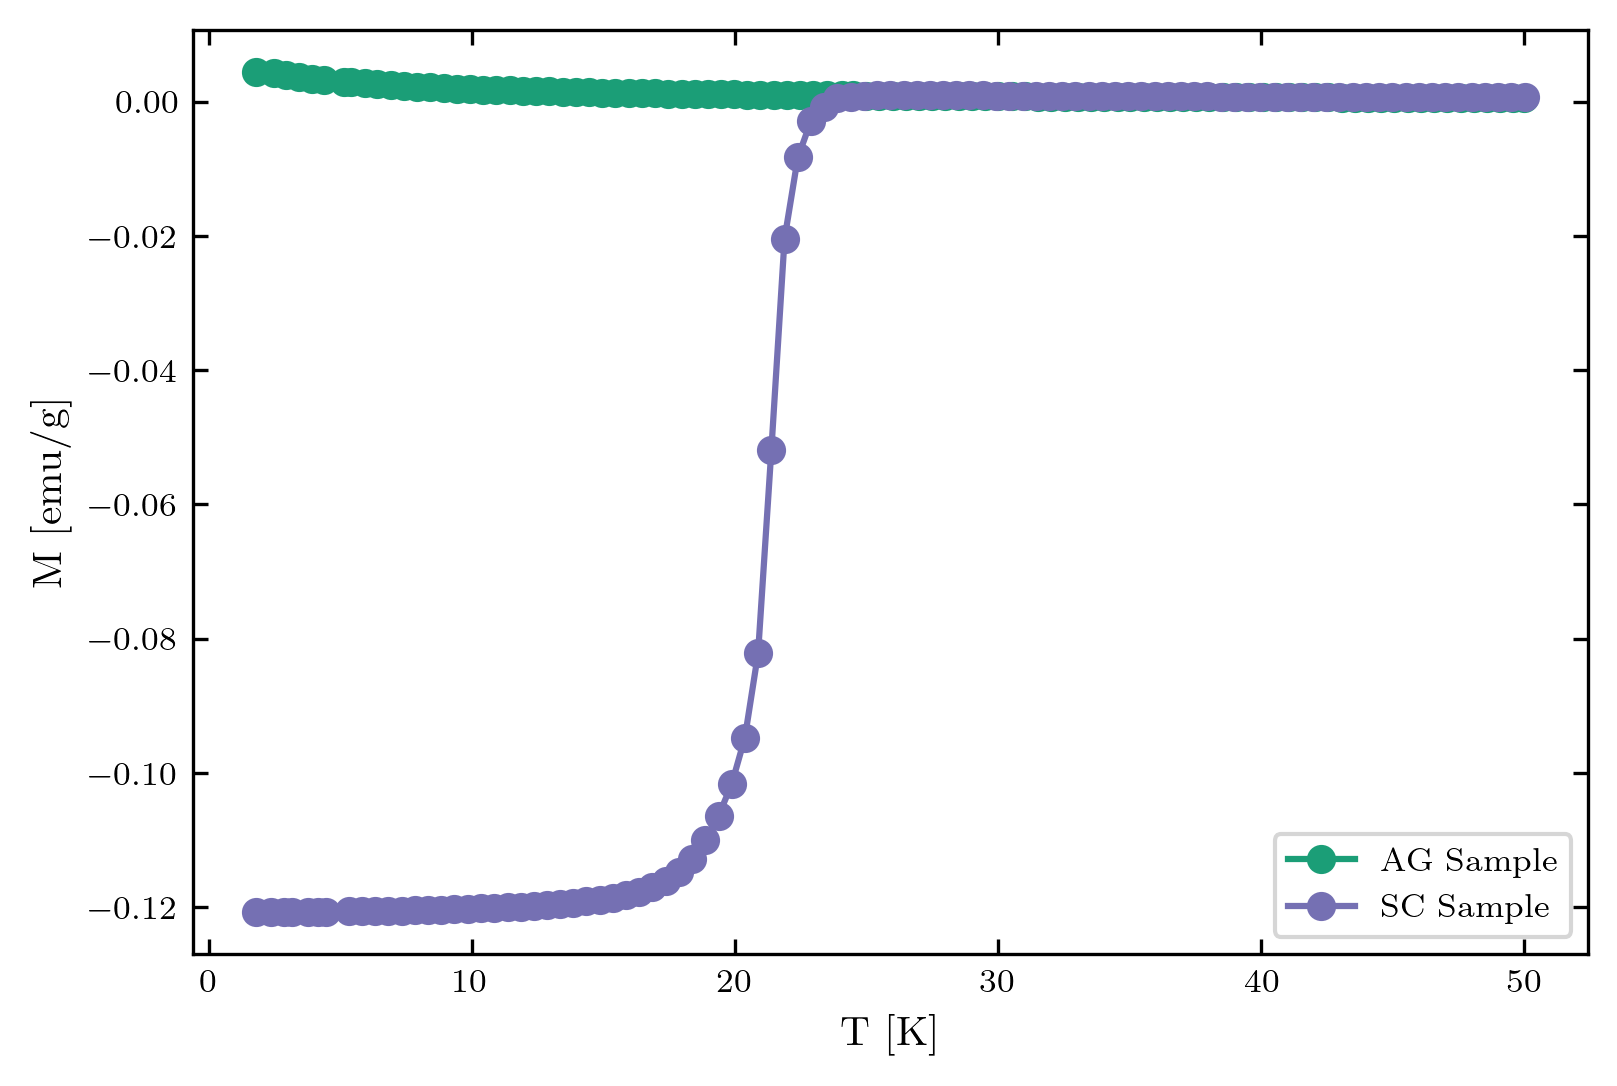

In [4]:
plt.figure(figsize=(6, 4))

plt.plot(Ag_sus['Temperature (K)'].iloc[: len(Ag_sus) // 2], Ag_sus['Long Moment (emu)'].iloc[: len(Ag_sus) // 2]/ 2.5718, label='AG Sample', marker='o')
#plt.plot(KU_sus['Temperature (K)'].iloc[: len(KU_sus) // 2], KU_sus['Long Moment (emu)'].iloc[: len(KU_sus) // 2]/0.0337, label='Sample B (SC)',marker='o')
plt.plot(UBC_sus['Temperature (K)'].iloc[: len(UBC_sus) // 2], UBC_sus['Long Moment (emu)'].iloc[: len(UBC_sus) // 2]/1.7521, label='SC Sample',marker='o')
plt.xlabel('T [K]')
plt.ylabel('M [emu/g]')
#plt.grid(linestyle='dotted')
plt.legend()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


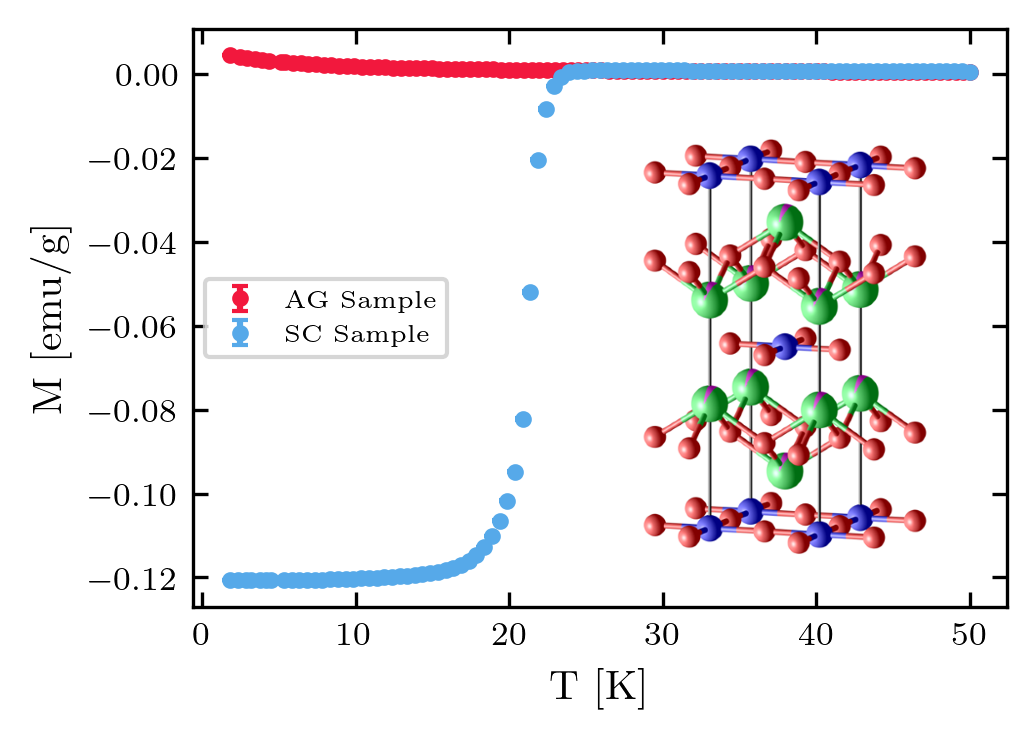

In [5]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Create the main figure
plt.figure()
# Long Scan Std Dev
# Plotting the data
plt.errorbar(Ag_sus['Temperature (K)'].iloc[: len(Ag_sus) // 2], 
         Ag_sus['Long Moment (emu)'].iloc[: len(Ag_sus) // 2] / 2.5718, yerr=Ag_sus['Long Scan Std Dev'].iloc[: len(Ag_sus) // 2] / 2.5718,
         label='AG Sample', marker='o', color='#f2183d', markersize=3, linestyle='none')
plt.errorbar(UBC_sus['Temperature (K)'].iloc[: len(UBC_sus) // 2],
             UBC_sus['Long Moment (emu)'].iloc[: len(UBC_sus) // 2] / 1.7521, yerr=UBC_sus['Long Scan Std Dev'].iloc[: len(UBC_sus) // 2] / 1.7521, label='SC Sample', marker='o', color='#56a9e9', markersize=3,linestyle='none')

# Labels and legend
plt.xlabel('T [K]')
plt.ylabel('M [emu/g]')
plt.legend(loc='center left',fontsize=6)

# Load the EPS file
img_path = "NCCO_crystal3.png"  # Replace with your EPS file path
img = Image.open(img_path)           # Load the EPS file
img.thumbnail((550, 550))            # Adjust the size if necessary       # Load the EPS file

# Define the crop box (left, upper, right, lower) in pixels
# Adjust these coordinates to fit the part of the image you want to crop
crop_box = (150, 0, 550, 510)
cropped_img = img.crop(crop_box)

# Resize the cropped image if necessary
cropped_img.thumbnail((500, 500))  # Adjust the size as needed

# Insert the cropped image as an inset
imagebox = OffsetImage(cropped_img, zoom=0.2)  # Adjust zoom level as needed
ab = AnnotationBbox(imagebox, (0.73, 0.45),  # (x, y) position in axes fraction
                    xycoords='axes fraction', frameon=False)
plt.gca().add_artist(ab)  # Add the inset to the current axis

plt.savefig('Figures_png/SQUID/SQUID_data.png', format='png', bbox_inches='tight')
plt.savefig('Figures_eps/SQUID/SQUID_data.eps', format='eps', bbox_inches='tight')


Text(0.5, 0.98, 'Temperature vs Magnetic Moment for Different Samples')

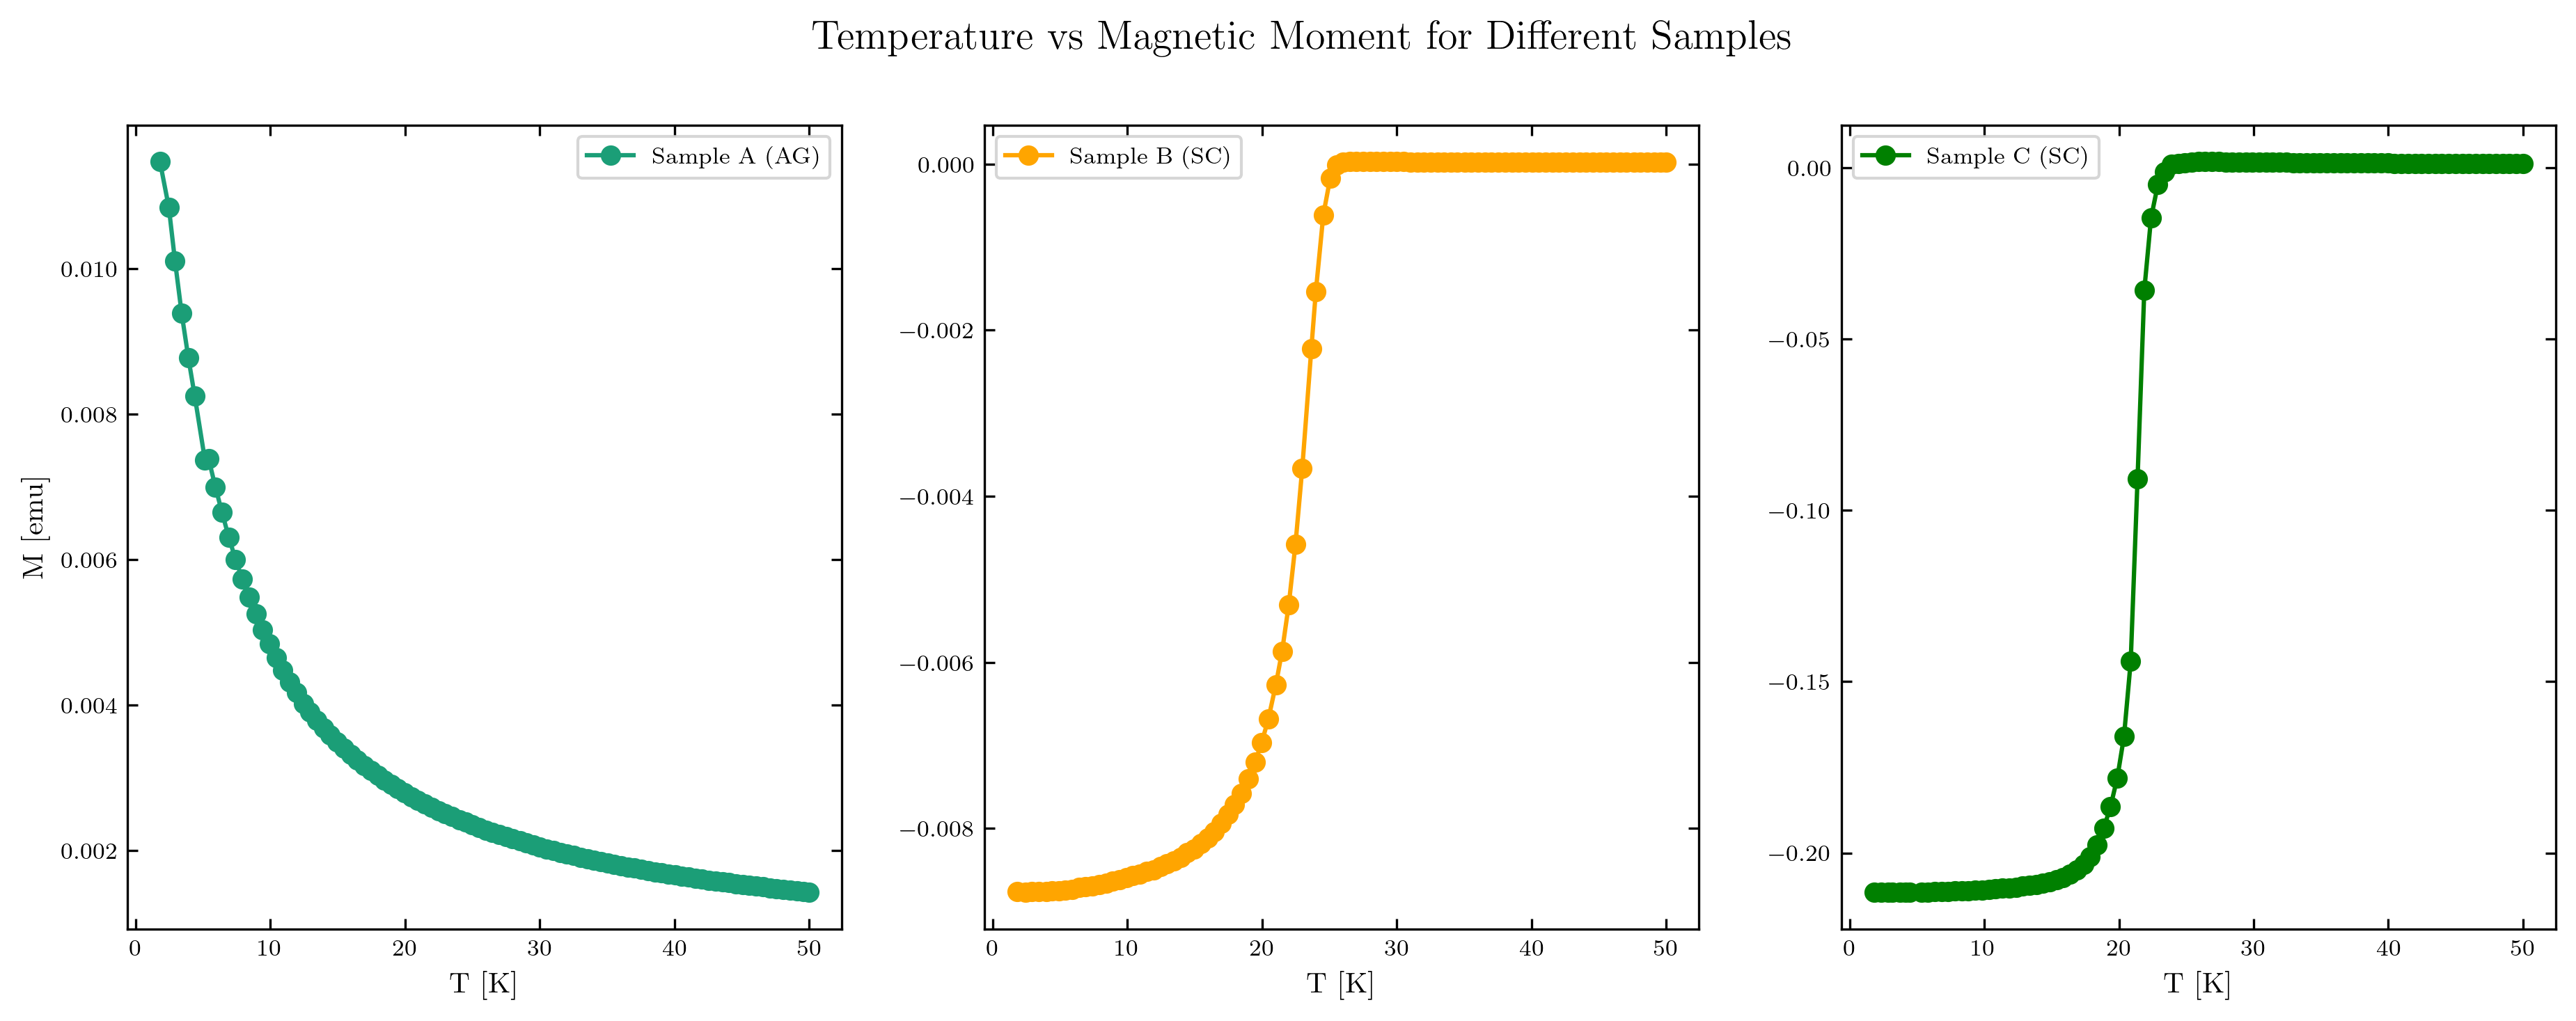

In [6]:
# Create a figure with three subplots arranged vertically
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each sample in a separate subplot
# Sample A
axes[0].plot(Ag_sus['Temperature (K)'].iloc[: len(Ag_sus) // 2],
             Ag_sus['Long Moment (emu)'].iloc[: len(Ag_sus) // 2],
             label='Sample A (AG)', marker='o')
axes[0].set_ylabel('M [emu]')
axes[0].set_xlabel('T [K]')
axes[0].legend()

# Sample B
axes[1].plot(KU_sus['Temperature (K)'].iloc[: len(KU_sus) // 2],
             KU_sus['Long Moment (emu)'].iloc[: len(KU_sus) // 2],
             label='Sample B (SC)', marker='o', color='orange')
axes[1].set_xlabel('T [K]')
axes[1].legend()

# Sample C
axes[2].plot(UBC_sus['Temperature (K)'].iloc[: len(UBC_sus) // 2],
             UBC_sus['Long Moment (emu)'].iloc[: len(UBC_sus) // 2],
             label='Sample C (SC)', marker='o', color='green')
axes[2].set_xlabel('T [K]')
axes[2].legend()

# Add a title to the entire figure (optional)
fig.suptitle("Temperature vs Magnetic Moment for Different Samples", fontsize=14)

# Display the plot